In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora, models
import pandas as pd
from nltk import FreqDist
import re
import spacy
import numpy as np
# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
nltk.download('stopwords')
 # one time run

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\banva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#!python -m spacy download en
import en_core_web_sm
nlp = en_core_web_sm.load()

In [4]:
reviews = ["I love it. I was looking for a small Dewalt Li. Charger. This one is good for tight spaces or over the wall, and its very efficient charging the batteries.The battery included was a little bit larger than the ones i already have so i had to remove the metal hanger from the drill in order to use the new batte So far no problems, preform as expected. good deal to save your 18 volt tools worked well and easy Works great except with my finish nail gun. Easy to use and a great way to extend the life of the older generation tools. The 20v conversion kit is a great price and value. The new smaller battery is lighter and not as bulky as the 18v batteries. I am so happy that I changed over. The vault see only time I buy the best Worth the cost nice to have a conversion from the old batteries and reuse the original tools. Very pricy, they are making a ton of money on these batteries. I love my speaker so much awesome bass system it\'s exactly what I want Although I have an older corded circular saw, when we began our house remodeling I decided that I wanted to get a cordless saw to use for making quick cuts, be it boards, panels, or trim. I liked the idea of having the saw available whenever or wherever I needed it, without having to worry about stringing out the extension cord, especially for a quick cut or two. Already having several batteries and being a fan of DeWalt, I took a look at their offerings and purchased the DCS391B 20V MAX 6-1/2&quot; Saw. I have been using the saw now for 6 months and I have been extremely pleased with its performance. The saw is lightweight, which I have found makes it much easier to control, especially for long cuts on plywood panels. Although the saw is quiet, it has plenty of power to handle whatever cuts I\'ve needed, from trim pieces to framing lumber and even trimming off the bottoms of wood doors with ease. The shape of the grip handle with its rubber covering is comfortable, while the power trigger safety and trigger switch are both easy to operate. The depth of blade and bevel adj"]

In [5]:
reviews

["I love it. I was looking for a small Dewalt Li. Charger. This one is good for tight spaces or over the wall, and its very efficient charging the batteries.The battery included was a little bit larger than the ones i already have so i had to remove the metal hanger from the drill in order to use the new batte So far no problems, preform as expected. good deal to save your 18 volt tools worked well and easy Works great except with my finish nail gun. Easy to use and a great way to extend the life of the older generation tools. The 20v conversion kit is a great price and value. The new smaller battery is lighter and not as bulky as the 18v batteries. I am so happy that I changed over. The vault see only time I buy the best Worth the cost nice to have a conversion from the old batteries and reuse the original tools. Very pricy, they are making a ton of money on these batteries. I love my speaker so much awesome bass system it's exactly what I want Although I have an older corded circular

In [6]:
df= pd.DataFrame(reviews,columns=['reviews'] )

In [24]:
df['reviews']

0    love looking small Dewalt Charger. This good t...
Name: reviews, dtype: object

In [8]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

In [9]:
stop_words = stopwords.words('english')


In [10]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

In [14]:
# remove short words (length < 4)
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [15]:
df['reviews']

0    love looking small Dewalt Charger. This good t...
Name: reviews, dtype: object

In [16]:
# remove stopwords from the text
exp = [remove_stopwords(r.split()) for r in df['reviews']]

In [21]:
type(exp)

list

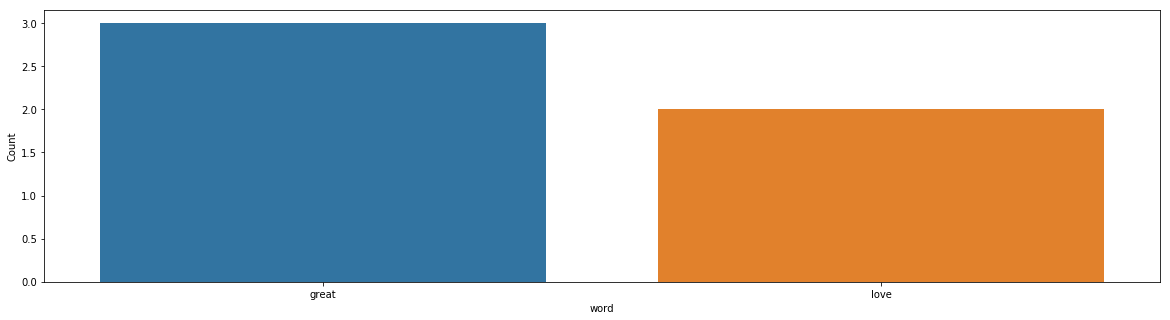

In [19]:
freq_words(exp,2)

In [23]:
# lemmatization

import en_core_web_sm
nlp = en_core_web_sm.load(disable=['parser', 'ner'])


def lemmatization(texts, tags=[ 'NOUN','ADJECTIVE','VERB']): # use verbs, adjectives and nouns 
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

tokenized_reviews = pd.Series(exp).apply(lambda x: x.split())
print(tokenized_reviews)

# delete most common words, such as relating the to product's name
#def delete_product_name(token_list):
 #   return [x for x in token_list if x not in ['kindle','fire','amazon', 'device', 'tablet', 'book', 'thing']]
#tokenized_reviews = tokenized_reviews.apply(delete_product_name)

reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2) # print lemmatized review

0    [love, looking, small, Dewalt, Charger., This,...
dtype: object
[['love', 'look', 'space', 'wall', 'charge', 'battery', 'battery', 'include', 'one', 'remove', 'metal', 'drill', 'order', 'batte', 'problem', 'preform', 'expect', 'deal', 'save', 'volt', 'tool', 'work', 'work', 'finish', 'nail', 'gun', 'extend', 'life', 'generation', 'tool', 'conversion', 'price', 'value', 'battery', 'bulky', 'battery', 'change', 'time', 'cost', 'conversion', 'battery', 'reuse', 'tool', 'pricy', 'make', 'money', 'battery', 'love', 'speaker', 'bass', 'system', 'want', 'cord', 'circular', 'saw', 'begin', 'house', 'remodeling', 'decide', 'want', 'cordless', 'make', 'cut', 'board', 'panel', 'trim', 'idea', 'need', 'worry', 'string', 'extension', 'cord', 'battery', 'take', 'look', 'offering', 'purchase', 'use', 'month', 'performance', 'find', 'make', 'control', 'cut', 'plywood', 'panel', 'power', 'handle', 'cut', 'need', 'trim', 'piece', 'frame', 'lumber', 'trim', 'bottom', 'wood', 'door', 'ease', 'handle'

In [25]:
[x for x in reviews_2 if x not in stop_words]

[['love',
  'look',
  'space',
  'wall',
  'charge',
  'battery',
  'battery',
  'include',
  'one',
  'remove',
  'metal',
  'drill',
  'order',
  'batte',
  'problem',
  'preform',
  'expect',
  'deal',
  'save',
  'volt',
  'tool',
  'work',
  'work',
  'finish',
  'nail',
  'gun',
  'extend',
  'life',
  'generation',
  'tool',
  'conversion',
  'price',
  'value',
  'battery',
  'bulky',
  'battery',
  'change',
  'time',
  'cost',
  'conversion',
  'battery',
  'reuse',
  'tool',
  'pricy',
  'make',
  'money',
  'battery',
  'love',
  'speaker',
  'bass',
  'system',
  'want',
  'cord',
  'circular',
  'saw',
  'begin',
  'house',
  'remodeling',
  'decide',
  'want',
  'cordless',
  'make',
  'cut',
  'board',
  'panel',
  'trim',
  'idea',
  'need',
  'worry',
  'string',
  'extension',
  'cord',
  'battery',
  'take',
  'look',
  'offering',
  'purchase',
  'use',
  'month',
  'performance',
  'find',
  'make',
  'control',
  'cut',
  'plywood',
  'panel',
  'power',
  'handl

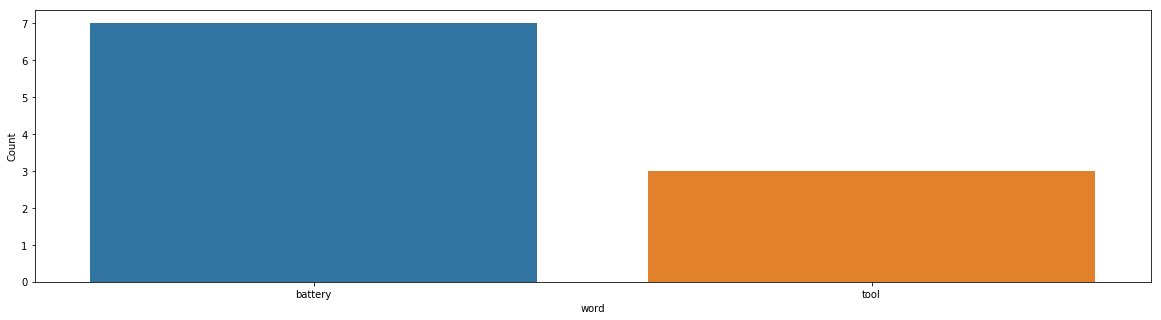

In [34]:
# replace review column with the cleaned version
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df['reviews'] = reviews_3

# Visualize
freq_words(df['reviews'], 2)

### Modelling

### LDA

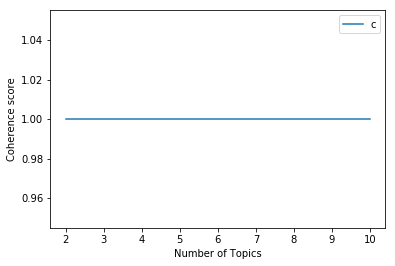

In [35]:
from gensim.models.coherencemodel import CoherenceModel
dictionary = corpora.Dictionary(reviews_2)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# check coherence score to decide number of topics 
c_v_score = []
for i in range(2,11):
    lda_model = LDA(corpus = doc_term_matrix, id2word = dictionary, num_topics = i, random_state = 44,
                chunksize = 1000, passes = 50)
    c_v_score.append(CoherenceModel(model=lda_model, texts=reviews_2, dictionary=dictionary, coherence='c_v').get_coherence())

# plot the score
# plot the coherence score
x = range(2, 11)
plt.plot(x, c_v_score)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [36]:
# train the model on optimal number of topics 
lda_model = LDA(corpus = doc_term_matrix, id2word = dictionary, num_topics = c_v_score.index(max(c_v_score))+1, random_state = 44,
                chunksize = 1000, passes = 50)

In [37]:
# get the topics
lda_model.print_topics()

[(0,
  '0.012*"operate" + 0.012*"generation" + 0.012*"decide" + 0.012*"problem" + 0.012*"string" + 0.012*"cost" + 0.012*"batte" + 0.012*"space" + 0.012*"speaker" + 0.012*"bass"'),
 (1,
  '0.012*"battery" + 0.012*"make" + 0.012*"tool" + 0.012*"trim" + 0.012*"conversion" + 0.012*"cost" + 0.012*"cord" + 0.012*"panel" + 0.012*"need" + 0.012*"cut"'),
 (2,
  '0.012*"battery" + 0.012*"trim" + 0.012*"cut" + 0.012*"work" + 0.012*"power" + 0.012*"make" + 0.012*"want" + 0.012*"cord" + 0.012*"trigger" + 0.012*"tool"'),
 (3,
  '0.057*"battery" + 0.025*"cut" + 0.025*"trim" + 0.025*"tool" + 0.025*"make" + 0.017*"love" + 0.017*"panel" + 0.017*"look" + 0.017*"conversion" + 0.017*"cord"'),
 (4,
  '0.012*"battery" + 0.012*"cut" + 0.012*"make" + 0.012*"trim" + 0.012*"conversion" + 0.012*"tool" + 0.012*"reuse" + 0.012*"handle" + 0.012*"expect" + 0.012*"trigger"')]

In [30]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\banva\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
3     -0.016385 -0.0       1        1  99.272003
4      0.004096  0.0       2        1   0.182000
1      0.004096 -0.0       3        1   0.182000
2      0.004096 -0.0       4        1   0.182000
0      0.004096 -0.0       5        1   0.182000, topic_info=   Category      Freq         Term     Total  loglift  logprob
2   Default  6.000000      battery  6.000000  30.0000  30.0000
40  Default  2.000000         make  2.000000  29.0000  29.0000
75  Default  2.000000         trim  2.000000  28.0000  28.0000
73  Default  2.000000         tool  2.000000  27.0000  27.0000
17  Default  2.000000          cut  2.000000  26.0000  26.0000
12  Default  1.000000   conversion  1.000000  25.0000  25.0000
74  Default  1.000000      trigger  1.000000  24.0000  24.0000
80  Default  1.000000         want  1.000000  23.0000  23.0000
50  Default  1.000000        panel  1.000000  22.0000  22.0000
38  Default  1.000000         love  1.000000  21.0000  21.0000
82  Default  1.000000         work  1.000000  20.0000  20.0000
13  Default  1.000000         cord  1.000000  19.0000  19.0000
45  Default  1.000000         need  1.000000  18.0000  18.0000
37  Default  1.000000         look  1.000000  17.0000  17.0000
32  Default  1.000000       handle  1.000000  16.0000  16.0000
54  Default  1.000000        power  1.000000  15.0000  15.0000
63  Default  1.000000       rubber  1.000000  14.0000  14.0000
47  Default  1.000000          one  1.000000  13.0000  13.0000
71  Default  1.000000         take  1.000000  12.0000  12.0000
68  Default  1.000000       string  1.000000  11.0000  11.0000
30  Default  1.000000   generation  1.000000  10.0000  10.0000
62  Default  1.000000        reuse  1.000000   9.0000   9.0000
35  Default  1.000000      include  1.000000   8.0000   8.0000
28  Default  1.000000       finish  1.000000   7.0000   7.0000
46  Default  1.000000     offering  1.000000   6.0000   6.0000
83  Default  1.000000        worry  1.000000   5.0000   5.0000
25  Default  1.000000       extend  1.000000   4.0000   4.0000
23  Default  1.000000         ease  1.000000   3.0000   3.0000
22  Default  1.000000        drill  1.000000   2.0000   2.0000
58  Default  1.000000      problem  1.000000   1.0000   1.0000
..      ...       ...          ...       ...      ...      ...
14   Topic5  0.002362     cordless  1.041617   0.2198  -4.4308
69   Topic5  0.002362       switch  1.041617   0.2198  -4.4308
61   Topic5  0.002362       remove  1.041617   0.2198  -4.4308
60   Topic5  0.002362   remodeling  1.041617   0.2198  -4.4308
64   Topic5  0.002362         save  1.041617   0.2198  -4.4308
79   Topic5  0.002362         wall  1.041617   0.2198  -4.4308
7    Topic5  0.002362        bulky  1.041617   0.2198  -4.4308
33   Topic5  0.002362        house  1.041617   0.2198  -4.4308
8    Topic5  0.002362       change  1.041617   0.2198  -4.4308
36   Topic5  0.002362         life  1.041617   0.2198  -4.4308
68   Topic5  0.002362       string  1.041617   0.2198  -4.4308
78   Topic5  0.002362         volt  1.041617   0.2198  -4.4308
5    Topic5  0.002362        board  1.041617   0.2198  -4.4308
49   Topic5  0.002362        order  1.041617   0.2198  -4.4308
44   Topic5  0.002362         nail  1.041617   0.2198  -4.4308
20   Topic5  0.002362        depth  1.041617   0.2198  -4.4308
35   Topic5  0.002362      include  1.041617   0.2198  -4.4308
3    Topic5  0.002362        begin  1.041617   0.2198  -4.4308
51   Topic5  0.002362  performance  1.041617   0.2198  -4.4308
56   Topic5  0.002362        price  1.041617   0.2198  -4.4308
25   Topic5  0.002362       extend  1.041617   0.2198  -4.4308
6    Topic5  0.002362       bottom  1.041617   0.2198  -4.4308
41   Topic5  0.002362        metal  1.041617   0.2198  -4.4308
43   Topic5  0.002362        month  1.041617   0.2198  -4.4308
23   Topic5  0.002362         ease  1.041617   0.2198  -4.4308
21   Topic5  0.002362  

In [39]:
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# functions
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

# function for creating lsa model
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

# function for computing coherence values
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# function for ploting coherence value
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

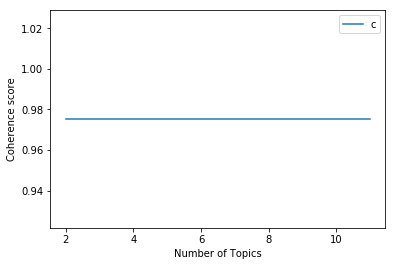

In [40]:
# plot the coherence plot 
start,stop,step=2,12,1
plot_graph(reviews_2,start,stop,step)

In [41]:
# train the model 
number_of_topics=3
words=10
clean_text = reviews_2
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

[(0, '0.611*"battery" + 0.339*"tool" + 0.272*"blade" + 0.204*"buy" + 0.204*"cut" + 0.136*"18v" + 0.136*"circular" + 0.136*"include" + 0.136*"saw" + 0.136*"think"'), (1, '-0.500*"product" + -0.500*"improvement" + -0.500*"handle" + -0.498*"need" + 0.021*"battery" + 0.012*"tool" + 0.009*"blade" + 0.007*"cut" + 0.007*"buy" + 0.005*"include"')]


In [42]:
# print topics 
model.print_topics()

[(0,
  '0.611*"battery" + 0.339*"tool" + 0.272*"blade" + 0.204*"buy" + 0.204*"cut" + 0.136*"18v" + 0.136*"circular" + 0.136*"include" + 0.136*"saw" + 0.136*"think"'),
 (1,
  '-0.500*"product" + -0.500*"improvement" + -0.500*"handle" + -0.498*"need" + 0.021*"battery" + 0.012*"tool" + 0.009*"blade" + 0.007*"cut" + 0.007*"buy" + 0.005*"include"')]